In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt #for scatter
import random
import pandas as pd



Automatically created module for IPython interactive environment


In [2]:
!pip install yellowbrick

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [3]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

In [4]:
df = pd.read_csv('fifa20.csv')
data = pd.DataFrame()
data['overall']=df['overall']
data['wage_eur'] = df['wage_eur']

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000276ED6A9400>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

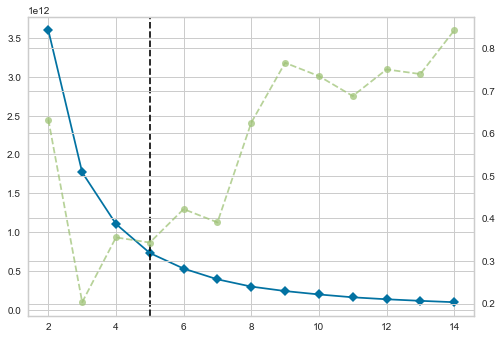

In [5]:
visualizer.fit(data)

In [18]:
# inisiasi k centroid dari dataset X
def init_centroid(X,k):
    n_sample= X.shape[0]
    point = random.sample(range(0, n_sample), k)
    centroid=[]
    for i in range(k):
        centroid.append(X[point[i]][:])
        
    return np.array(centroid)
#     unik_cent = list(set(centroid))
#     print(point)

In [19]:
def euc_distance(mtxA, mtxB):
    A_square = np.reshape(np.sum(mtxA * mtxA, axis=1), (mtxA.shape[0], 1))
    B_square = np.reshape(np.sum(mtxB * mtxB, axis=1), (mtxB.shape[0]), 1)
    AB = mtxA @ mtxB.T
    return np.sqrt(-2 * AB + B_square + A_square)
    

In [53]:
def get_cluster(X, cent, distance_method):
    k = cent.shape[0]
    cluster ={}
#     print('apaja',X[:][0,1])
    dist_matrix = distance_method(X, cent)
    
    closest_cluster_ids = np.argmin(dist_matrix, axis=1)

    for i in range(k):
        cluster[i] = []
    print(enumerate(closest_cluster_ids))
    for i, cluster_id in enumerate(closest_cluster_ids):
        cluster[cluster_id].append(X[i])
        
    return cluster
    

In [54]:
def cover_centroid(prev_cent, new_cent, dist_method, move_threshold):
    dist_prev_vs_new = dist_method(prev_cent, new_cent)
    covered_cent = np.max(dist_prev_vs_new.diagonal()) <= move_threshold
    
    return covered_cent

In [55]:
def kmeans(X, k, dist_method, move_threshold):
    new_cent = init_centroid(X=X, k=k)
    print('ini init centroid', new_cent)
    centroids_covered = False
    
    while not centroids_covered:
        prev_cent = new_cent
        clusters = get_cluster(X, prev_cent, dist_method)
        
        new_cent = np.array([np.mean(clusters[key], axis=0, dtype=X.dtype)
                                  for key in sorted(clusters.keys())])
        centroids_covered = cover_centroid(prev_cent, new_cent, dist_method, move_threshold)
        print('ini cover c', centroids_covered)
    return new_cent

ini init centroid [[  56 1000]
 [  62 3000]
 [  59 1000]
 [  66 3000]
 [  73 1000]]
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c False
ini cover c True
ini centroid yang di main [   77.71904128 52884.15446072]
ini centroid yang di main [8.32721893e+01 1.23029586e+05]
ini centroid yang di main [   73.73553085 20547.71943273]
ini c

<function matplotlib.pyplot.show(*args, **kw)>

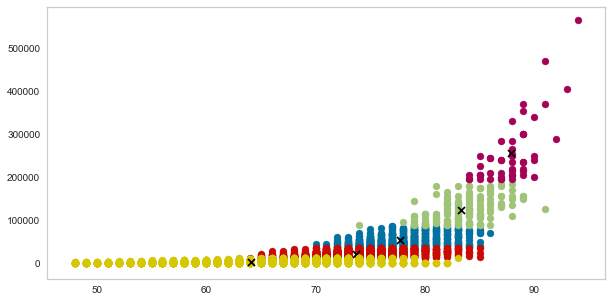

In [56]:

from sklearn.preprocessing import StandardScaler
dum = np.array(data)


centroids = kmeans(dum, k=5, dist_method=euc_distance, move_threshold=0.0001)
clusters = get_cluster(dum, centroids, euc_distance)

plt.rcParams['figure.figsize'] = [10, 5]
for centroid, points in clusters.items():
    points = np.array(points)
#     print('ini point yang di main',points)    
    centroid = np.mean(points, axis=0)
    print('ini centroid yang di main',centroid)
    plt.scatter(points[:, 0], points[:, 1], marker='o')
    plt.grid()
    plt.scatter(centroid[0], centroid[1], marker='x', color="black")
plt.show    


In [24]:
points


array([[    94, 565000],
       [    93, 405000],
       [    92, 290000],
       [    91, 470000],
       [    91, 370000],
       [    90, 250000],
       [    90, 200000],
       [    90, 340000],
       [    90, 240000],
       [    89, 220000],
       [    89, 205000],
       [    89, 235000],
       [    89, 215000],
       [    89, 300000],
       [    89, 300000],
       [    89, 355000],
       [    89, 235000],
       [    89, 300000],
       [    89, 370000],
       [    88, 215000],
       [    88, 250000],
       [    88, 255000],
       [    88, 205000],
       [    88, 235000],
       [    88, 285000],
       [    88, 265000],
       [    88, 195000],
       [    88, 330000],
       [    88, 205000],
       [    88, 220000],
       [    87, 195000],
       [    87, 210000],
       [    87, 240000],
       [    87, 200000],
       [    87, 285000],
       [    87, 240000],
       [    87, 195000],
       [    86, 195000],
       [    86, 210000],
       [    86, 245000],


In [25]:
centroids

array([[    77,  52884],
       [    73,  20547],
       [    83, 123029],
       [    64,   3120],
       [    87, 257300]], dtype=int64)

In [57]:
clusters

{0: [array([   86, 69000], dtype=int64),
  array([   85, 76000], dtype=int64),
  array([   85, 73000], dtype=int64),
  array([   85, 77000], dtype=int64),
  array([   85, 69000], dtype=int64),
  array([   85, 69000], dtype=int64),
  array([   85, 39000], dtype=int64),
  array([   85, 49000], dtype=int64),
  array([   84, 61000], dtype=int64),
  array([   84, 70000], dtype=int64),
  array([   84, 40000], dtype=int64),
  array([   84, 78000], dtype=int64),
  array([   84, 37000], dtype=int64),
  array([   84, 41000], dtype=int64),
  array([   84, 54000], dtype=int64),
  array([   84, 71000], dtype=int64),
  array([   84, 37000], dtype=int64),
  array([   84, 75000], dtype=int64),
  array([   84, 43000], dtype=int64),
  array([   84, 44000], dtype=int64),
  array([   84, 67000], dtype=int64),
  array([   84, 74000], dtype=int64),
  array([   83, 76000], dtype=int64),
  array([   83, 46000], dtype=int64),
  array([   83, 78000], dtype=int64),
  array([   83, 38000], dtype=int64),
  array([